# EAD of all variables

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import mpl_toolkits
from mpl_toolkits.basemap import Basemap

from matplotlib.colors import LinearSegmentedColormap
from geopy.geocoders import Nominatim
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 144
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import re



In [5]:
df=pd.read_csv('../data/df.csv').set_index(['state_county','State','County'])
del df['Code']
df.head()

,,,sentiment,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,frac_high_school_lower,frac_high_school,frac_college,frac_bachelor_or_higher
state_county,State,County,,,,,,,,,,,,,,,,,,,,,
45001.0,South Carolina,Abbeville County,0.075153,24997.0,12308.0,12689.0,1.2,68.9,27.9,0.1,0.0,0.0,...,9294.0,80.2,13.5,6.2,0.0,10.7,21.9,37.5,28.3,12.3
22001.0,Louisiana,Acadia Parish,0.076139,62163.0,30023.0,32140.0,2.1,77.7,17.4,0.2,0.2,0.2,...,24619.0,82.4,10.6,7.0,0.0,10.1,26.2,39.2,24.1,10.5
51001.0,Virginia,Accomack County,0.076547,33115.0,16117.0,16998.0,8.8,60.9,28.6,0.4,0.1,0.0,...,14296.0,73.2,18.6,7.7,0.5,6.8,19.7,39.9,21.7,18.8
16001.0,Idaho,Ada County,0.080676,417501.0,208879.0,208622.0,7.6,85.5,1.1,0.5,2.6,0.2,...,199955.0,77.2,15.8,6.9,0.1,6.6,5.8,21.4,35.8,37.1
19001.0,Iowa,Adair County,0.244170,7426.0,3667.0,3759.0,1.5,97.2,0.4,0.0,0.3,0.0,...,3776.0,73.6,15.6,10.6,0.1,3.2,7.5,44.7,32.5,15.3


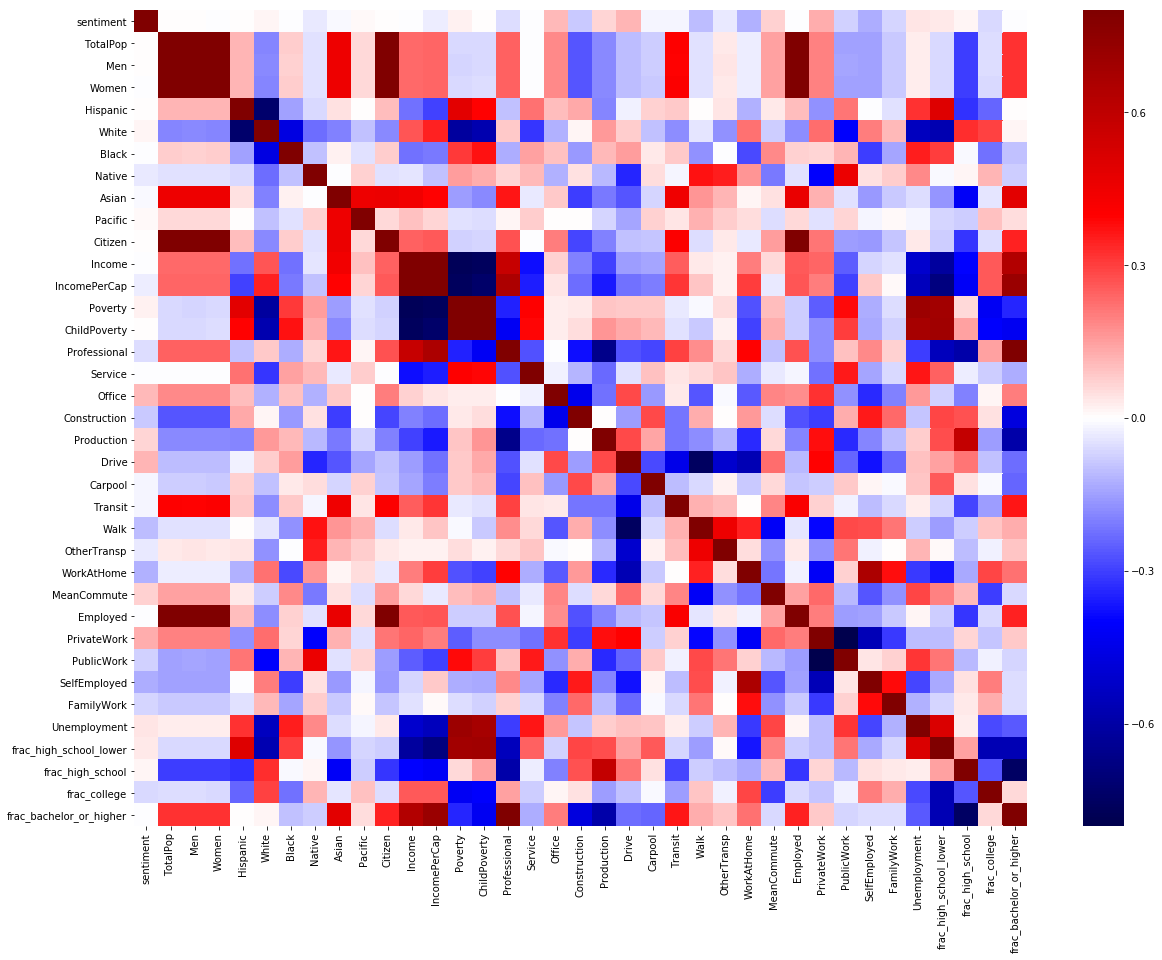

In [8]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            vmin=-0.8,vmax=0.8,
           cmap = "seismic")

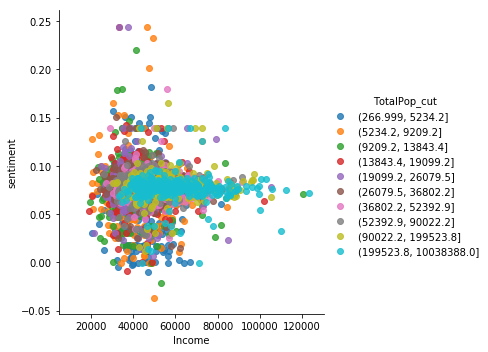

In [16]:
df['TotalPop_cut']=pd.qcut(df['TotalPop'].values,10)
sns.lmplot( x="Income", y="sentiment", data=df, fit_reg=False, hue='TotalPop_cut', legend=True)


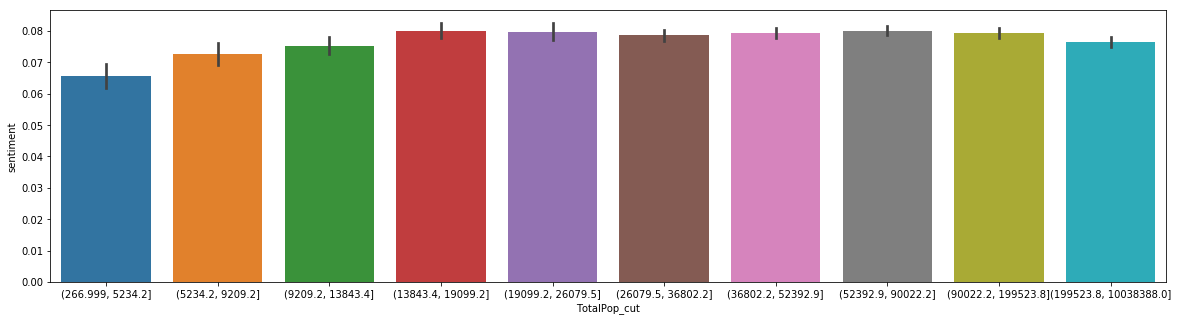

In [22]:
fig=plt.subplots(1,1,figsize=(20,5))
sns.barplot(x='TotalPop_cut', y="sentiment", data=df)